*Important note: this analysis still needs a lot of improving. No feature selection has been done (yet), and I have a strong doubt about how to calculate AUC value (still to be solved by internet and my master tutor in the following days or weeks - I hope it's days), which is why some coding AUC results are different from the ones written in the text. 26/5/19*

# MYOPIA  DATA ANALYSIS WITH CLASSIFICATION ALGORITHMS TRAINING
Celia Parejo Aranda

May-2019

Dataset taken from: Hosmer, D.W., Lemeshow, S. and Sturdivant, R.X. (2013) Applied Logistic Regression, 3rd ed., New York: Wiley

This dataset contains the results of an investigation that was carried out for 5 years, in which the ocular health of a population was studied. The samples correspond to the values initially taken in the research, and there is a variable called 'MYOPIC' which registers wether the subject was diagnosed with myopia during the study. The feature are the following: 

* ID: subject identifier (1-1503)
* STUDYYEAR: year subject entered the study (year)
* **MYOPIC: myopia development within the first five years of follow up (0: No, 1: Yes)**
* AGE: age at first visit (years)
* GENDER: gender (0: Male, 1: Female)
* SPHEQ: spherical Equivalent Refraction (diopter)
* AL: axial Length (mm)
* ACD: anterior chamber depth (mm)
* LT: lens Thickness (mm)
* VCD: vitreous chamber depth (mm)
* SPORTHR: how many hours per week outside of school the child spent engaging in sports/outdoor activities (Hours per week)
* READHR: how many hours per week outside of school the child spent reading for pleasure (Hours per week)
* COMPHR: how many hours per week outside of school the child spent playing video/computer games or working on the computer (Hours per week)
* STUDYHR: how many hours per week outside of school the child spent reading or studying for school assignments (Hours per week)
* TVHR: how many hours per week outside of school the child spent watching television (Hours per week)
* DIOPTERHR: Composite of near-work activities (Hours per week). DIOPTERHR = 3 (READHR + STUDYHR) + 2 COMPHR + TVHR
* MOMMY: was the subject's mother myopic? (0: No, 1: Yes)
* DADMY: was the subject's father myopic? (0: No, 1: Yes)

Our goal will be, firstly, exploring the data; and secondly, predicting the appearance of myopia in the study set.
In order to reach this last goal, we will create the following models:
* **Logistic Regression**
* **K-nearest neighbors**
* **Random Forest**
* **Naïve Bayes**
* **Support Vector Machine**

And then create an **ensemble of the best three** to see if we can improve their results.

Let's start importing and overviewing the data:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
myo = pd.read_csv('myopia.csv', sep = ';')

In [3]:
myo.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
myo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
ID           618 non-null int64
STUDYYEAR    618 non-null int64
MYOPIC       618 non-null int64
AGE          618 non-null int64
GENDER       618 non-null int64
SPHEQ        618 non-null float64
AL           618 non-null float64
ACD          618 non-null float64
LT           618 non-null float64
VCD          618 non-null float64
SPORTHR      618 non-null int64
READHR       618 non-null int64
COMPHR       618 non-null int64
STUDYHR      618 non-null int64
TVHR         618 non-null int64
DIOPTERHR    618 non-null int64
MOMMY        618 non-null int64
DADMY        618 non-null int64
dtypes: float64(5), int64(13)
memory usage: 87.0 KB


Seems like there are no null values, and data types are all correct.

In [5]:
myo.describe()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,309.500000,1992.359223,0.131068,6.299353,0.488673,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,178.545512,1.734507,0.337748,0.712950,0.500277,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,1.000000,1990.000000,0.000000,5.000000,0.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,155.250000,1991.000000,0.000000,6.000000,0.000000,0.456250,22.040000,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,309.500000,1992.000000,0.000000,6.000000,0.000000,0.729000,22.465000,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,463.750000,1994.000000,0.000000,6.000000,1.000000,1.034000,22.970000,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,618.000000,1995.000000,1.000000,9.000000,1.000000,4.372000,24.560000,4.250000,4.112000,17.300000,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


___
## Exploratory analysis and feature engineering

In [6]:
myo.STUDYYEAR.value_counts()

1990    131
1993    111
1994    103
1991     97
1995     88
1992     88
Name: STUDYYEAR, dtype: int64

In [7]:
myo.STUDYYEAR.value_counts(normalize = True).sort_index()

1990    0.211974
1991    0.156958
1992    0.142395
1993    0.179612
1994    0.166667
1995    0.142395
Name: STUDYYEAR, dtype: float64

The research started in 1990 and lasted until 2000. Let's see how many individuals finished the study suffering from myopia:

Text(0.5, 0, 'Myopic')

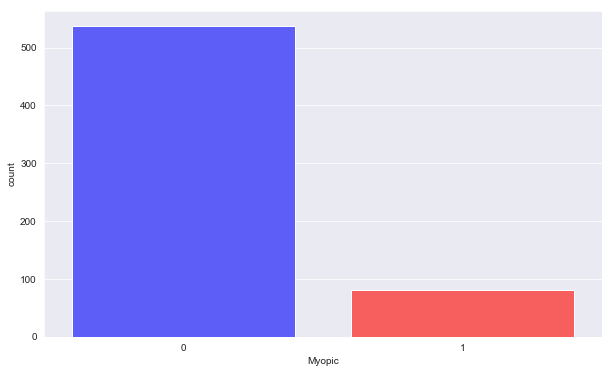

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(myo['MYOPIC'], palette = 'seismic', saturation = 0.90)
plt.xlabel('Myopic')

Well, good news. Seems like less than a quarter of the individuals who participated in the study developed myopia within the five years during which it took place. However, this inequal distribution of data may make it harder for our future models to predict this feature.

The study was focused on children. Let's plot a histogram to see the distribution of their ages:

In [9]:
myo.AGE.value_counts()

6    456
7     82
8     53
5     21
9      6
Name: AGE, dtype: int64

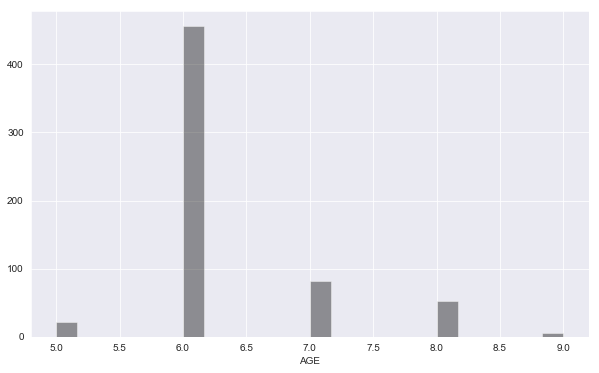

In [10]:
plt.figure(figsize = (10,6))
sns.distplot(myo['AGE'], color = 'black', kde = False)

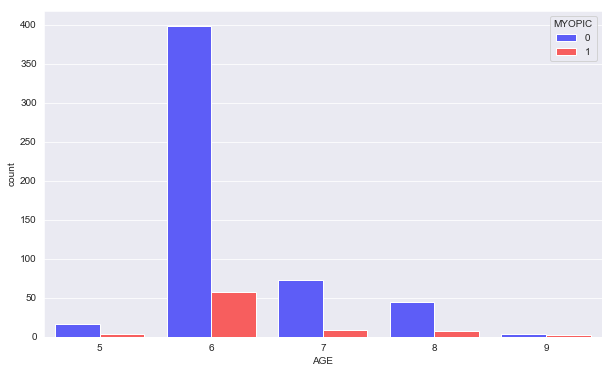

In [11]:
plt.figure(figsize = (10,6))
sns.countplot(myo['AGE'], hue = myo['MYOPIC'], palette = 'seismic', saturation = 0.90)

We can see that the great majority of the children were 6 years old when they joined the study group, and only a small fraction of them developed myopia.

Let's see if differences were found between girls and boys:

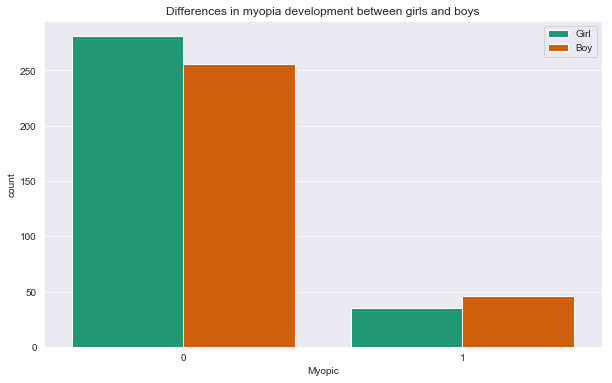

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(myo['MYOPIC'], palette = 'Dark2', saturation = 0.9, hue = myo['GENDER'])
plt.xlabel('Myopic')
plt.title('Differences in myopia development between girls and boys')

plt.legend(loc = 'upper right', labels = ['Girl', 'Boy'])

In [13]:
# Percentages of girls who did not develop/developed myopia
myo[myo.GENDER == 0]['MYOPIC'].value_counts(normalize = True)

0    0.889241
1    0.110759
Name: MYOPIC, dtype: float64

In [14]:
# Percentages of boys who did not develop/developed myopia
myo[myo.GENDER == 1]['MYOPIC'].value_counts(normalize = True)

0    0.847682
1    0.152318
Name: MYOPIC, dtype: float64

Text(0.5, 1.0, 'BOYS')

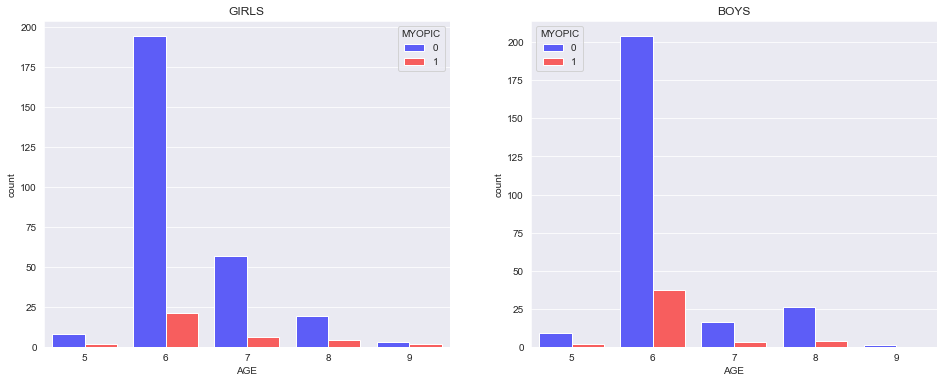

In [15]:
fig, axs = plt.subplots(ncols = 2, figsize = (16,6))

sns.countplot(myo[myo.GENDER == 0]['AGE'], hue = myo['MYOPIC'], 
              palette = 'seismic', saturation = 0.9, ax = axs[0]).set_title('GIRLS')

sns.countplot(myo[myo.GENDER == 1]['AGE'], hue = myo['MYOPIC'], 
              palette = 'seismic', saturation = 0.9, ax = axs[1]).set_title('BOYS')

Boys and girls apparently follow the same pattern, but, at least at first sight, boys seem to have a slightly higher tendence to suffer from myopia. Let's check if that difference is significant:

In [16]:
# Student's t test
noM_G = myo[myo.MYOPIC == 0]['GENDER']
M_G= myo[myo.MYOPIC == 1]['GENDER']

from scipy import stats
stats.ttest_ind(noM_G, M_G)

Ttest_indResult(statistic=-1.5307024831569083, pvalue=0.12635629504253768)

According to our results, we cannot state, with a 95% confidence level, that the percentage of boys who developed myopia during the research is higher than the girls'.

Let's jump now to their parents condition, analyzing whether having one parent or two parents with myopia increased their chances to suffer from it as well:

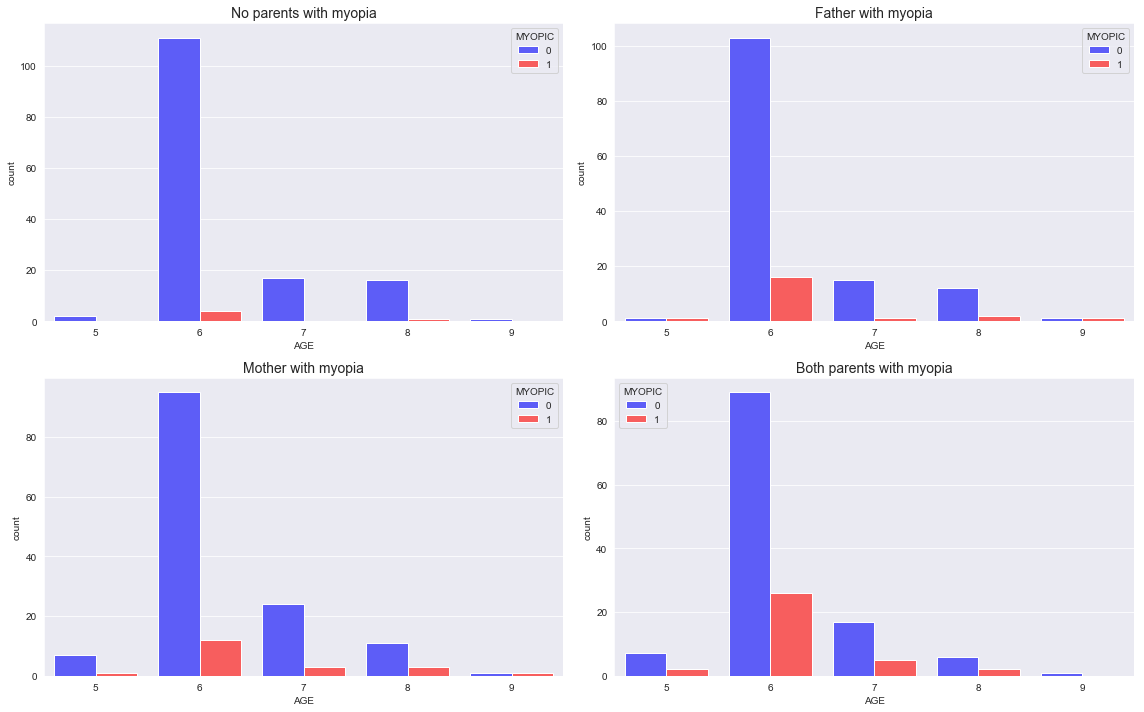

In [17]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))

sns.countplot(myo[(myo.MOMMY == 0) & (myo.DADMY == 0)]['AGE'], hue = myo['MYOPIC'], 
              palette = 'seismic', saturation = 0.9, ax = axs[0][0]).set_title('No parents with myopia', fontsize = 14)

sns.countplot(myo[(myo.MOMMY == 0) & (myo.DADMY == 1)]['AGE'], hue = myo['MYOPIC'], 
              palette = 'seismic', saturation = 0.9, ax = axs[0][1]).set_title('Father with myopia', fontsize = 14)

sns.countplot(myo[(myo.MOMMY == 1) & (myo.DADMY == 0)]['AGE'], hue = myo['MYOPIC'], 
              palette = 'seismic', saturation = 0.9, ax = axs[1][0]).set_title('Mother with myopia', fontsize = 14)

sns.countplot(myo[(myo.MOMMY == 1) & (myo.DADMY == 1)]['AGE'], hue = myo['MYOPIC'], 
              palette = 'seismic', saturation = 0.9, ax = axs[1][1]).set_title('Both parents with myopia', fontsize = 14)

fig.tight_layout()

Here we can observe a clear relationship between having myopia and parents (father and/or mother) who suffer from it. This correlation is specially remarkable when comparing children who have no parents with myopia and children whose both parents have it, but also noticeable in the cases when only the mother *or* the father is myopic.

To check if this difference is statistically significant, we will perform three t-tests:

In [18]:
# No myopic parents vs both myopic
noM = myo[(myo.MOMMY == 0) & (myo.DADMY == 0)]['MYOPIC']
bothM = myo[(myo.MOMMY == 1) & (myo.DADMY == 1)]['MYOPIC']

stats.ttest_ind(noM, bothM)

Ttest_indResult(statistic=-5.222901946708593, pvalue=3.267944072133075e-07)

In [19]:
# No myopic parents vs myopic mother
noM = myo[(myo.MOMMY == 0) & (myo.DADMY == 0)]['MYOPIC']
momM = myo[(myo.MOMMY == 1) & (myo.DADMY == 0)]['MYOPIC']

stats.ttest_ind(noM, momM)

Ttest_indResult(statistic=-3.064336645532566, pvalue=0.002374459027711811)

In [20]:
# No myopic parents vs myopic fother 
noM = myo[(myo.MOMMY == 0) & (myo.DADMY == 0)]['MYOPIC']
dadM = myo[(myo.MOMMY == 0) & (myo.DADMY == 1)]['MYOPIC']

stats.ttest_ind(noM, dadM)

Ttest_indResult(statistic=-3.3109474890075568, pvalue=0.0010422180246934907)

According to these results, in all cases, having a myopic parent increased the risk of developing myopia. Therefore, inheritance is definitely a factor to take into account.

Let's explore the numerical features that are related to habits:

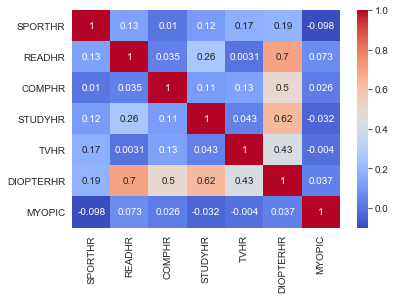

In [21]:
# Create a separate dataframe with just the variables related to habits + MYOPIC
habits = myo[['SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MYOPIC']]
sns.heatmap(habits.corr(), cmap = 'coolwarm', annot = True)

None of these variables seem to be, on their own, a determining cause for myopia. However, that is not surprising, as many factors may be involved in the development of this defect in eye refraction. Let's draw a pairplot to see if we can find any correlation between habits and myopia:

C:\Users\celia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\celia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


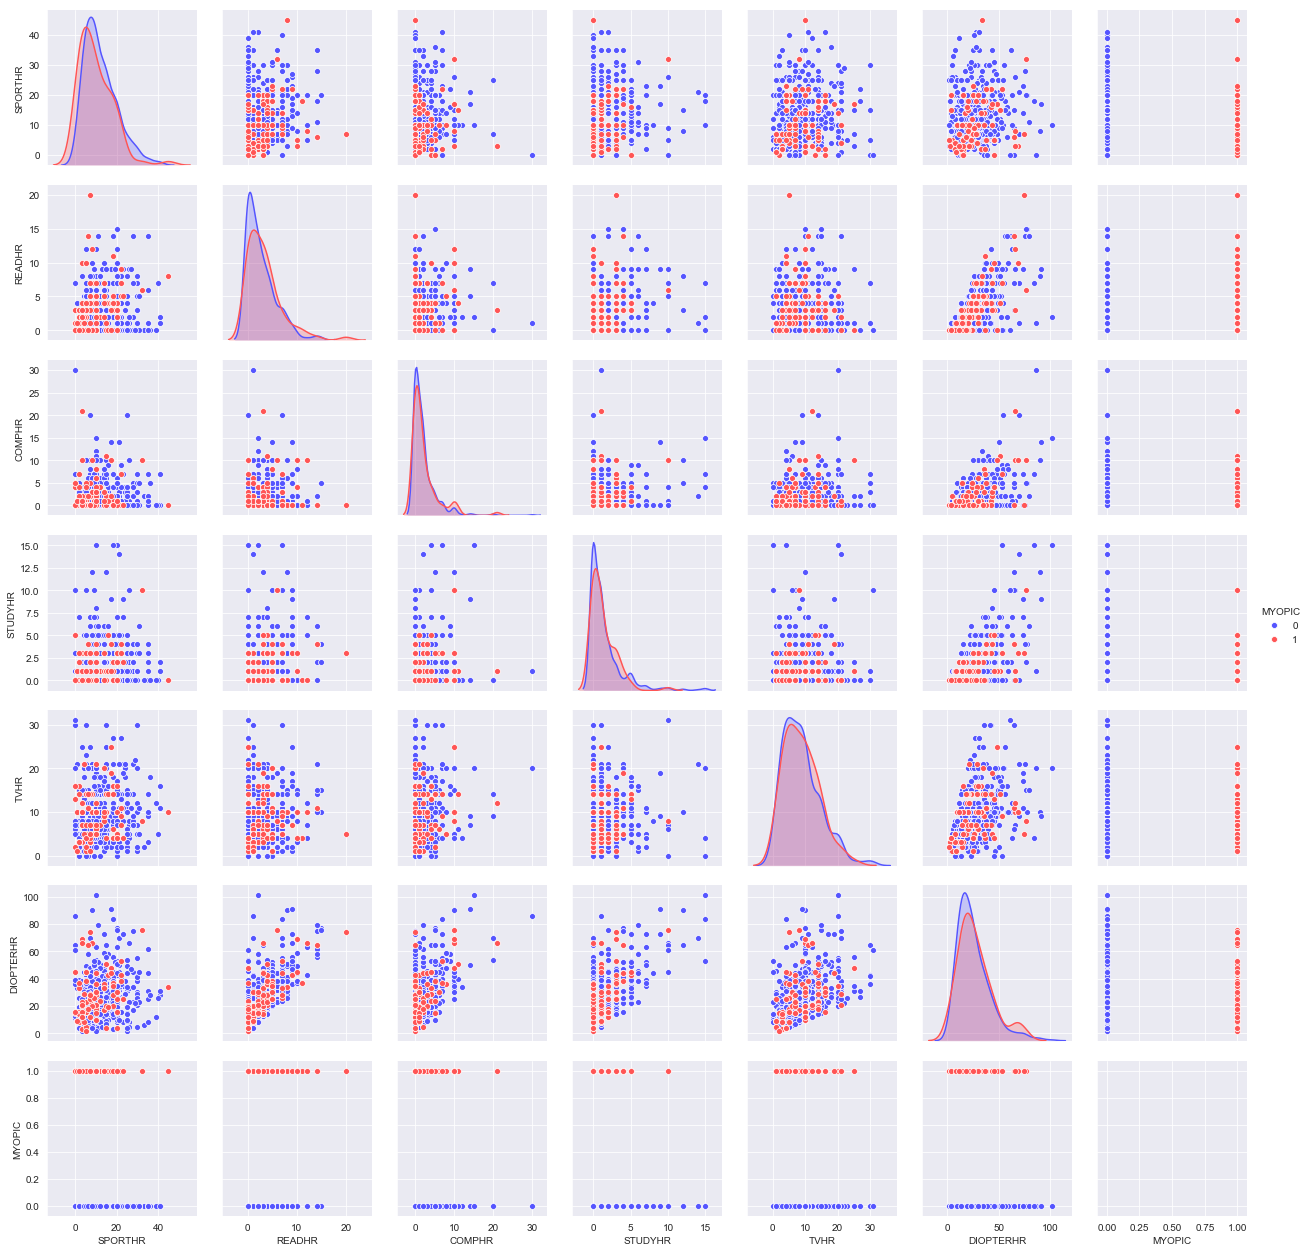

In [22]:
sns.pairplot(habits, hue = 'MYOPIC', palette = 'seismic')

Here we can observe some interesting behaviours. For example, contrary to what we could expect, kids who spend more hours per week studying or reading could have lower risk of developing myopia. On the other hand, in all cases, kids who do more sport seem to have a lower tendency of suffering this kind of visual problem. Nonetheless, that is only the apparent behaviour. Let's study this features more closely:

Text(0.5, 1.0, 'Reading + Sport')

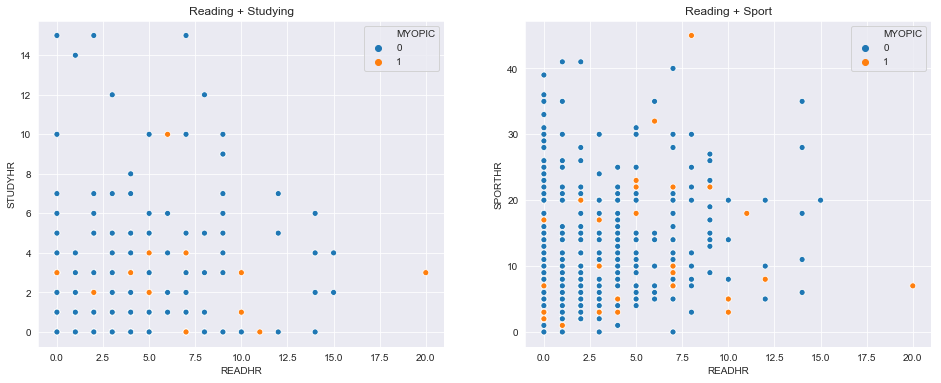

In [23]:
# Reading + Studying, and Reading + Sport
fig, axs = plt.subplots(ncols = 2, figsize = (16,6))
sns.scatterplot(x = 'READHR', y = 'STUDYHR', data = myo, 
                hue = 'MYOPIC', ax = axs[0]).set_title('Reading + Studying')
sns.scatterplot(x = 'READHR', y = 'SPORTHR', data = myo, 
                hue = 'MYOPIC',ax = axs[1]).set_title('Reading + Sport')

Text(0.5, 1.0, 'Sport + Computer')

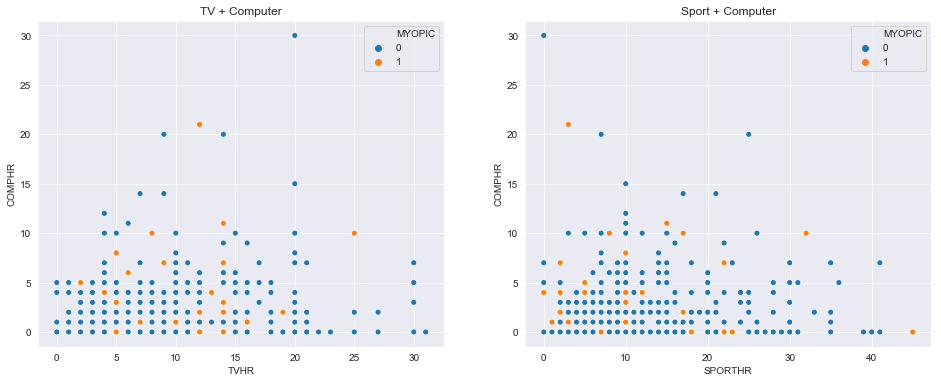

In [24]:
# TV + Computer, and Sport + Computer
fig, axs = plt.subplots(ncols = 2, figsize = (16,6))
sns.scatterplot(x = 'TVHR', y = 'COMPHR', data = myo, 
                hue = 'MYOPIC', ax = axs[0]).set_title('TV + Computer')
sns.scatterplot(x = 'SPORTHR', y = 'COMPHR', data = myo, 
                hue = 'MYOPIC',ax = axs[1]).set_title('Sport + Computer')

Text(0.5, 1.0, 'Composite of near-work activities')

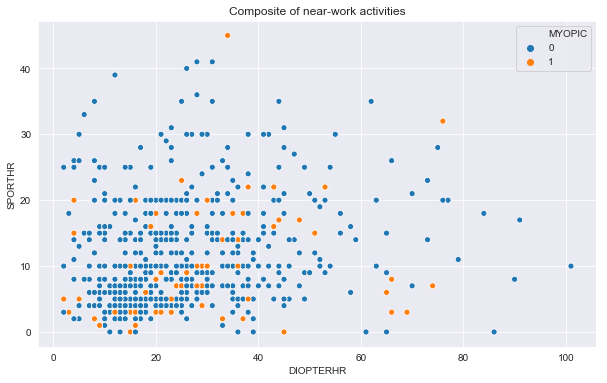

In [25]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'DIOPTERHR', y = 'SPORTHR', data = myo, hue = 'MYOPIC')
plt.title('Composite of near-work activities')

There does not really seem to be any clear correlation between these pairs of variables and myopia development. 

The 'SPORTHR' variable is the only one which could, maybe, explain a little amount of the variation in 'MYOPIC', so let's dive into it:

Text(0.5, 1.0, 'Hours dedicated to doing sport')

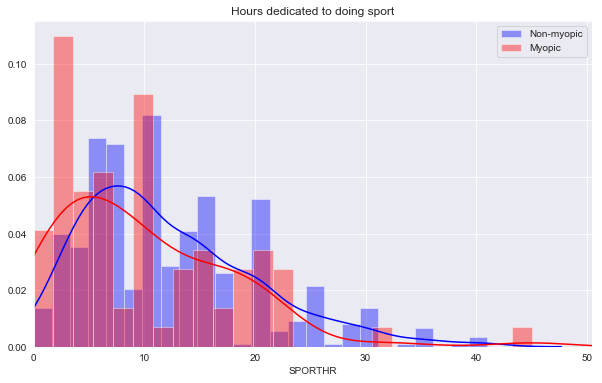

In [26]:
plt.figure(figsize = (10,6))
sns.distplot(myo[myo.MYOPIC == 0]['SPORTHR'], 
             color = 'blue', bins = 25).set(xlim = (0, None))
sns.distplot(myo[myo.MYOPIC == 1]['SPORTHR'], 
             color = 'red', bins = 25).set(xlim = (0, None))
plt.legend(labels = ['Non-myopic', 'Myopic'])
plt.title('Hours dedicated to doing sport')

Well, we can see that the majority of kids who did little or no sport ended up suffering from myopia, and apparently there were less positives for this defect among the kids who used to spend more hours on this activity; however, there is not a clear separation between these two groups.

Let's try to gain a deeper understanding by dividing the SPORTHR numerical variable into 'None', 'Low', 'Medium' and 'High', according to the amount of hours kids dedicated to doing sport per week:

In [27]:
myo['SPORTHR'].head(10)

0    45
1     4
2    14
3    18
4    14
5    10
6    12
7    12
8     4
9    30
Name: SPORTHR, dtype: int64

In [28]:
myo['SPORTHR'].value_counts().sort_index().head(10)

0    11
1     7
2    25
3    26
4    33
5    41
6    32
7    40
8    32
9    20
Name: SPORTHR, dtype: int64

In [29]:
sport_hours = list(myo['SPORTHR'])
sport_hours.remove(0)
sport_hours = np.asarray(sport_hours)

# Using pd.cut() to calculate equal intervals
# (we know there are 45 possible values for 'SPORTHR' (apart from 0 hours), 
# but I do this as a way of practising with binning):

bins = np.linspace(min(sport_hours), max(sport_hours), 4)
group_names = ['Low', 'Medium', 'High']
sport_hours_binned = pd.cut(sport_hours, bins, labels = group_names, 
                            include_lowest = True, retbins = True)
sport_hours_binned

([High, Low, Low, Medium, Low, ..., Low, Low, Low, Low, Medium]
 Length: 617
 Categories (3, object): [Low < Medium < High], array([ 0., 15., 30., 45.]))

In [30]:
# array([ 0., 15., 30., 45.])
def sp(val):
    if val == 0: return 'None'
    elif val <= 15: return 'Low'
    elif val <= 30: return 'Medium'
    else: return 'High'

In [31]:
myo['SPORTHRb'] = myo['SPORTHR'].apply(lambda val:sp(val))
myo.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,SPORTHRb
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1,High
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1,Low
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0,Low
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1,Medium
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0,Low


Text(0.5, 1.0, 'Hours of sport per week')

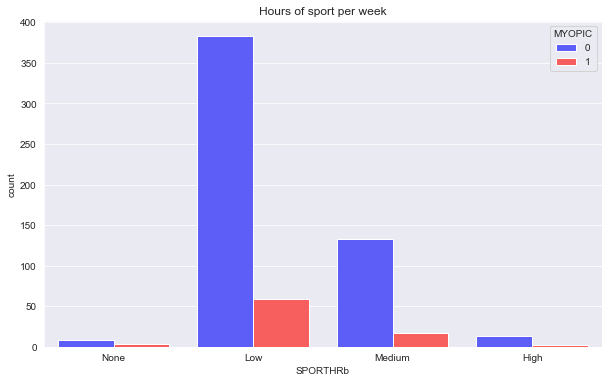

In [32]:
plt.figure(figsize = (10,6))
sns.countplot(myo['SPORTHRb'], palette = 'seismic', saturation = 0.9, 
              hue = myo['MYOPIC'], order=['None', 'Low', 'Medium', 'High'])
plt.title('Hours of sport per week')

This graph suggests that most of the children belong to the 'Low' class, and it shows that a small fraction of each one of the classes ended up developing myopia. Let's calculate the exact size of those fractions:

In [33]:
per_classes = pd.DataFrame([myo[myo.MYOPIC == 0]['SPORTHRb'].value_counts(), 
                    myo[myo.MYOPIC == 1]['SPORTHRb'].value_counts()])
per_classes

,Low,Medium,High,None
SPORTHRb,383,133,13,8
SPORTHRb,59,17,2,3


In [34]:
# Percentage of kids w/o myopia within each class
per_levels = pd.DataFrame([myo[myo.SPORTHRb == 'None']['MYOPIC'].value_counts(normalize = True),
                        myo[myo.SPORTHRb == 'Low']['MYOPIC'].value_counts(normalize = True),
                         myo[myo.SPORTHRb == 'Medium']['MYOPIC'].value_counts(normalize = True),
                           myo[myo.SPORTHRb == 'High']['MYOPIC'].value_counts(normalize = True)], 
                    index = ['None', 'Low', 'Medium', 'High'])
round(per_levels, 3)

,0,1
None,0.727,0.273
Low,0.867,0.133
Medium,0.887,0.113
High,0.867,0.133


It seems like in all classes the risk of developing myopia is almost the same. We might think that children who did no sport had a higher risk, but the sample is so small that this statement would not be reliable.

Let's move on to the last group of independent variables, this is, the ones related to eye measures (+ lens thickness):

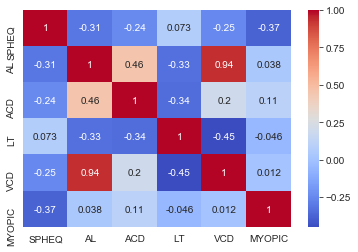

In [35]:
# Create a separate dataframe with just the variables related to eye measures + MYOPIC
eyes = myo[['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'MYOPIC']]
sns.heatmap(eyes.corr(), cmap = 'coolwarm', annot = True)

C:\Users\celia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\celia\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


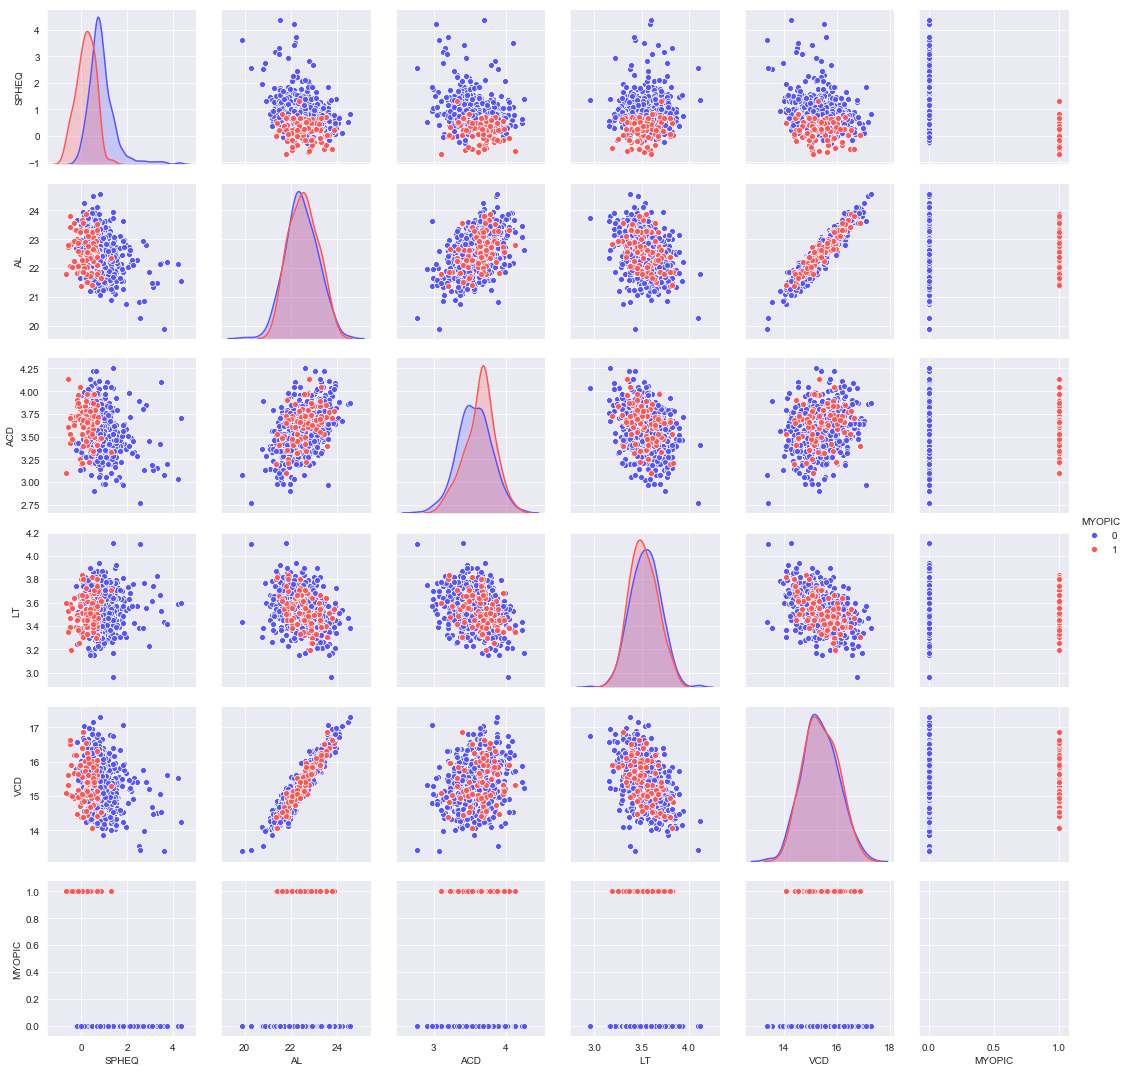

In [36]:
sns.pairplot(eyes, hue = 'MYOPIC', palette = 'seismic')

Here we can observe a (potentially) strongly predictive variable: SPHEQ (Spherical Equivalent Refraction). Also ACD (Anterior Chamber Depth) shows a different pattern in myopic and non-myopic children. Let's focus on them:

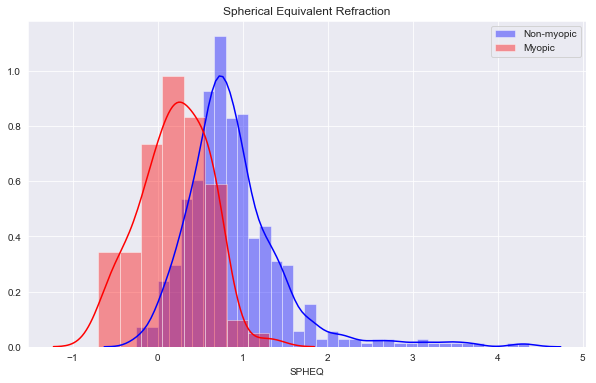

In [37]:
plt.figure(figsize = (10,6))
sns.distplot(myo[myo.MYOPIC == 0]['SPHEQ'], color = 'blue')
sns.distplot(myo[myo.MYOPIC == 1]['SPHEQ'], color = 'red')
plt.title('Spherical Equivalent Refraction')
plt.legend(['Non-myopic', 'Myopic'])

In [38]:
noM = myo[myo.MYOPIC == 0]['SPHEQ'].mean()
M = myo[myo.MYOPIC == 1]['SPHEQ'].mean()

print(f'*Non-myopic children have a mean SPHEQ value of {round(noM,3)}')
print(f'*Myopic children have a mean SPHEQ value of {round(M,3)}')

*Non-myopic children have a mean SPHEQ value of 0.892
*Myopic children have a mean SPHEQ value of 0.199


In [39]:
# Student's t test
noM_S = myo[myo.MYOPIC == 0]['SPHEQ']
M_S = myo[myo.MYOPIC == 1]['SPHEQ']

from scipy import stats
stats.ttest_ind(noM_S, M_S)

Ttest_indResult(statistic=9.997558863072491, pvalue=6.562382432203691e-22)

p-value is definitely lower than 0.05, so we can assume that the mean SPHEQ value of children who developed myopia is significantly lower than the same value for non-developers.

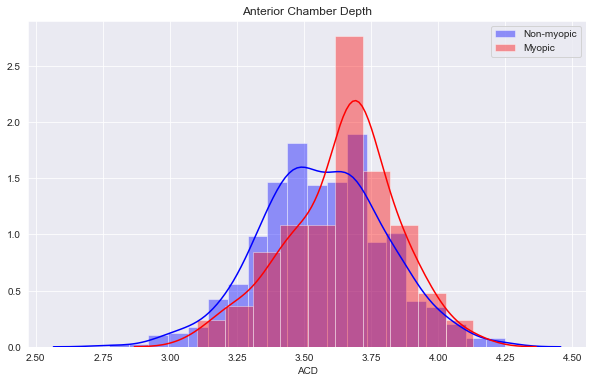

In [40]:
plt.figure(figsize = (10,6))
sns.distplot(myo[myo.MYOPIC == 0]['ACD'], color = 'blue')
sns.distplot(myo[myo.MYOPIC == 1]['ACD'], color = 'red')
plt.title('Anterior Chamber Depth')
plt.legend(['Non-myopic', 'Myopic'])

In [41]:
noM_A = myo[myo.MYOPIC == 0]['ACD'].mean()
M_A = myo[myo.MYOPIC == 1]['ACD'].mean()

print(f'*Non-myopic children have a mean ACD value of {round(noM_A,3)}')
print(f'*Myopic children have a mean ACD value of {round(M_A,3)}')

*Non-myopic children have a mean ACD value of 3.569
*Myopic children have a mean ACD value of 3.643


In [42]:
# Student's t test
noM_A = myo[myo.MYOPIC == 0]['ACD']
M_A= myo[myo.MYOPIC == 1]['ACD']

from scipy import stats
stats.ttest_ind(noM_A, M_A)

Ttest_indResult(statistic=-2.6950668584770088, pvalue=0.007229504312348075)

Once more, p-value is lower than the 0.05 threshold, which lets us assume that the ACD mean values of both groups are significantly different, being slightly higher for those who developed myopia within the five years of the study.

This is the end of this first part of our analysis, from which we have learnt the following things:
* Boys and girls had the same risk of developing myopia
* Having one myopic parent increased the probability of developing myopia.
* Having both parents with myopia increased, even more, that risk.
* Habits like doing sport out of school, studying, reading for pleasure, watching TV, spending time in front of the computer screen... did not appear to, **on their own**, influence the probability of developing myopia
* Certain values such as SPHEQ and ACD may have a strong influence on the mentioned probability, specially the first one

Nevertheless, this information might be skewed by the fact that only a small fraction of the total individuals who participated in the study developed this eye defect within those 5 years. This may have a negative effect on the quality of our future models.

___
## Data pre-processing

In [43]:
myo.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,SPORTHRb
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1,High
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1,Low
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0,Low
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1,Medium
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0,Low


Our dataset is almost already prepared. We will simply drop unnecessary columns, such as 'ID', 'STUDYYEAR' and 'SPORTHRb', and scale the data:

In [44]:
myo.drop(['ID', 'SPORTHRb', 'STUDYYEAR'], axis = 1, inplace = True)

In [45]:
myo.head()

,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [46]:
X = myo[myo.columns[1:]]
y = pd.DataFrame(myo['MYOPIC'])

In [47]:
# Data normalization
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_X.fit(X)
scaled_X = scaler_X.transform(X)

scaler_y = StandardScaler()
scaler_y.fit(y)
scaled_y = scaler_y.transform(y)

C:\Users\celia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\celia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\celia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\celia\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
                                                    scaled_y,
                                                    test_size = 0.3,
                                                    random_state = 101)

## Machine learning: classification

Now that we have explored and prepared our dataset, let's start modeling. As it was explained at the beginning of this document, we will first try five different classification algorithms, and then create an ensemble of the best three. 

* **Logistic Regression**
* **K-nearest neighbors**
* **Random Forest**
* **Naïve Bayes**
* **Support Vector Machine**

Our criterion will be maximizing the AUC value.

Let's start with **Logistic Regression**.

Note: training the model on y_train directly produces the error 'Unknown label type: 'continuous', that is why we will use LabelEncoder() first:

In [49]:
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(np.ravel(y_train))
y_test_encoded = lab_enc.fit_transform(np.ravel(y_test))

In [50]:
# Logistic model
from sklearn.linear_model import LogisticRegression as lr

logmodel = lr(solver = 'lbfgs')
logmodel.fit(X_train, y_train_encoded)

y_train_pred = logmodel.predict(X_train)
y_test_pred = logmodel.predict(X_test)

In [51]:
# Checking overfitting
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Training set')
print('*Accuracy:', accuracy_score(y_train_encoded, y_train_pred))
print('*Precision:', precision_score(y_train_encoded, y_train_pred))
print('*Recall:', recall_score(y_train_encoded, y_train_pred))
print('\nTesting set')
print('*Accuracy:', accuracy_score(y_test_encoded, y_test_pred))
print('*Precision:', precision_score(y_test_encoded, y_test_pred))
print('*Recall:', recall_score(y_test_encoded, y_test_pred))

Training set
*Accuracy: 0.8958333333333334
*Precision: 0.696969696969697
*Recall: 0.39655172413793105

Testing set
*Accuracy: 0.8978494623655914
*Precision: 0.6428571428571429
*Recall: 0.391304347826087


In [52]:
# Another way of checking overfitting
from sklearn.metrics import confusion_matrix

conf_mat_train = confusion_matrix(y_train_encoded, y_train_pred)
conf_mat_test = confusion_matrix(y_test_encoded, y_test_pred)

print(f'Normalized confusion matrix for the training set is:')
print(conf_mat_train / sum(conf_mat_train))
print('\n')
print(f'Normalized confusion matrix for the testing set is:')
print(conf_mat_test / sum(conf_mat_test))

Normalized confusion matrix for the training set is:
[[0.9122807 0.3030303]
 [0.0877193 0.6969697]]


Normalized confusion matrix for the testing set is:
[[0.91860465 0.35714286]
 [0.08139535 0.64285714]]


In [55]:
# Area under the ROC curve
from sklearn.metrics import roc_auc_score
print('AUC:', roc_auc_score(y_test_encoded, logmodel.predict_proba(X_test)[:,1]))

AUC: 0.8684982662043212


So with this first model we have been able to get an AUC of 0.68. Let's see if the next ones can get a higher one. Next one will be a **k-nn classifier**:

Text(0, 0.5, 'AUC')

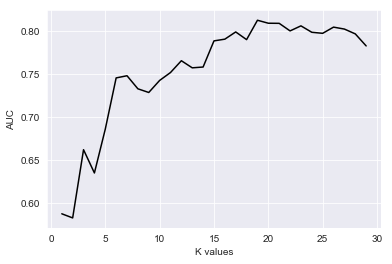

In [58]:
# Finding optimum K value
from sklearn.neighbors import KNeighborsClassifier
auc_values = []

for val in range(1,30):
    findk = KNeighborsClassifier(n_neighbors = val)
    findk.fit(X_train, y_train_encoded)
    
    y_train_pred = findk.predict(X_train)
    y_test_pred = findk.predict(X_test)
    
    roc_auc = roc_auc_score(y_test_encoded, findk.predict_proba(X_test)[:,1])
    auc_values.append(roc_auc)

plt.plot(range(1,30), auc_values, color = 'black')
plt.xlabel('K values')
plt.ylabel('AUC')

In [61]:
# k = 25
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train_encoded)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [62]:
# Checking overfitting
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Training set')
print('*Accuracy:', accuracy_score(y_train_encoded, y_train_pred))
print('*Precision:', precision_score(y_train_encoded, y_train_pred))
print('*Recall:', recall_score(y_train_encoded, y_train_pred))
print('\nTesting set')
print('*Accuracy:', accuracy_score(y_test_encoded, y_test_pred))
print('*Precision:', precision_score(y_test_encoded, y_test_pred))
print('*Recall:', recall_score(y_test_encoded, y_test_pred))

Training set
*Accuracy: 0.8680555555555556
*Precision: 1.0
*Recall: 0.017241379310344827

Testing set
*Accuracy: 0.8763440860215054
*Precision: 0.0
*Recall: 0.0


C:\Users\celia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# # k = 10
# knn = KNeighborsClassifier(n_neighbors = 10)
# knn.fit(X_train, y_train_encoded)

# y_train_pred = knn.predict(X_train)
# y_test_pred = knn.predict(X_test)

In [ ]:
# print('Training set')
# print('*Accuracy:', accuracy_score(y_train_encoded, y_train_pred))
# print('*Precision:', precision_score(y_train_encoded, y_train_pred))
# print('*Recall:', recall_score(y_train_encoded, y_train_pred))
# print('\nTesting set')
# print('*Accuracy:', accuracy_score(y_test_encoded, y_test_pred))
# print('*Precision:', precision_score(y_test_encoded, y_test_pred))
# print('*Recall:', recall_score(y_test_encoded, y_test_pred))

In [65]:
# Area under the ROC curve
roc_auc_score(y_test_encoded, knn.predict_proba(X_test)[:,1])

0.7974126433715657

We will now try with a **Random Forest** algorithm:

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 101)
rf.fit(X_train, y_train_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [67]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Training set')
print('*Accuracy:', accuracy_score(y_train_encoded, y_train_pred))
print('*Precision:', precision_score(y_train_encoded, y_train_pred))
print('*Recall:', recall_score(y_train_encoded, y_train_pred))
print('\nTesting set')
print('*Accuracy:', accuracy_score(y_test_encoded, y_test_pred))
print('*Precision:', precision_score(y_test_encoded, y_test_pred))
print('*Recall:', recall_score(y_test_encoded, y_test_pred))

Training set
*Accuracy: 1.0
*Precision: 1.0
*Recall: 1.0

Testing set
*Accuracy: 0.8817204301075269
*Precision: 0.5454545454545454
*Recall: 0.2608695652173913


Let's try to reduce overfitting by optimizing the maximum depth parameter:

Text(0, 0.5, 'AUC')

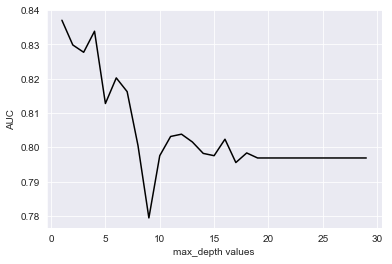

In [68]:
# Finding optimum max_depth value
auc_values = []

for val in range(1,30):
    rf = RandomForestClassifier(n_estimators = 100, max_depth = val, random_state = 101)
    rf.fit(X_train, y_train_encoded)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    roc_auc = roc_auc_score(y_test_encoded, rf.predict_proba(X_test)[:,1])
    auc_values.append(roc_auc)

plt.plot(range(1,30), auc_values, color = 'black')
plt.xlabel('max_depth values')
plt.ylabel('AUC')

In [69]:
# max_depth = 20
rf = RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state = 101)
rf.fit(X_train, y_train_encoded)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [70]:
print('Training set')
print('*Accuracy:', accuracy_score(y_train_encoded, y_train_pred))
print('*Precision:', precision_score(y_train_encoded, y_train_pred))
print('*Recall:', recall_score(y_train_encoded, y_train_pred))
print('\nTesting set')
print('*Accuracy:', accuracy_score(y_test_encoded, y_test_pred))
print('*Precision:', precision_score(y_test_encoded, y_test_pred))
print('*Recall:', recall_score(y_test_encoded, y_test_pred))

Training set
*Accuracy: 1.0
*Precision: 1.0
*Recall: 1.0

Testing set
*Accuracy: 0.8817204301075269
*Precision: 0.5454545454545454
*Recall: 0.2608695652173913


In [71]:
# Area under the ROC curve
roc_auc_score(y_test_encoded, rf.predict_proba(X_test)[:,1])

0.7968791677780742

In [77]:
# This is the same as doing:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X_test, y_test_encoded, cv = 3, scoring = 'roc_auc').mean()

0.7934603976270642

Well, up until now, the logistic model holds the first position in our ranking of models, followed by the random forest. Let's see how **Naïve Bayes** works:

In [78]:
from sklearn import naive_bayes

nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train_encoded)

y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

In [79]:
print('Training set')
print('*Accuracy:', accuracy_score(y_train_encoded, y_train_pred))
print('*Precision:', precision_score(y_train_encoded, y_train_pred))
print('*Recall:', recall_score(y_train_encoded, y_train_pred))
print('\nTesting set')
print('*Accuracy:', accuracy_score(y_test_encoded, y_test_pred))
print('*Precision:', precision_score(y_test_encoded, y_test_pred))
print('*Recall:', recall_score(y_test_encoded, y_test_pred))

Training set
*Accuracy: 0.875
*Precision: 0.5454545454545454
*Recall: 0.41379310344827586

Testing set
*Accuracy: 0.8548387096774194
*Precision: 0.35714285714285715
*Recall: 0.21739130434782608


In [81]:
# Area under the ROC curve
roc_auc_score(y_test_encoded, nb.predict_proba(X_test)[:,1])

0.8146172312616698

Finally, let's go with **Support Vector Machines** algorithm:

In [82]:
# Using GridSearch to look for the optimum C and gamma values
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train_encoded)

C:\Users\celia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8620689655172413, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8680555555555556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8671328671328671, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8620689655172413, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8680555555555556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8671328671328671, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8680555555555556, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8671328671328671, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8620689655172413, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8680555555555556, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8671328671328671, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8137931034482758, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished
C:\Users\celia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [83]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [84]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
sv = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

sv.fit(X_train, y_train_encoded)

y_train_pred = sv.predict(X_train)
y_test_pred = sv.predict(X_test)

In [91]:
print('Training set')
print('*Accuracy:', accuracy_score(y_train_encoded, y_train_pred))
print('*Precision:', precision_score(y_train_encoded, y_train_pred))
print('*Recall:', recall_score(y_train_encoded, y_train_pred))
print('\nTesting set')
print('*Accuracy:', accuracy_score(y_test_encoded, y_test_pred))
print('*Precision:', precision_score(y_test_encoded, y_test_pred))
print('*Recall:', recall_score(y_test_encoded, y_test_pred))

Training set
*Accuracy: 0.9027777777777778
*Precision: 0.7857142857142857
*Recall: 0.3793103448275862

Testing set
*Accuracy: 0.9086021505376344
*Precision: 0.7142857142857143
*Recall: 0.43478260869565216


In [92]:
# Area under the ROC curve
roc_auc_score(y_test_encoded, sv.predict_proba(X_test)[:,1])

0.854094425180048

It seems like support vector machine has done a pretty good job, being the best of the tested models.

Our final step will consist of creating an ensemble of the three tested models with the highest AUC value, in other words: 
* SVM (AUC = 0.71)
* Logistic Regression (0.68) 
* and Random Forest (0.64)

We will use Naïve Bayes as the meta-classifier.

In [93]:
from mlxtend.classifier import StackingClassifier

st1 = sv
st2 = logmodel
st3 = rf

metaclass = nb

stacked = StackingClassifier(classifiers = [st1, st2, st3], 
                          meta_classifier = metaclass)

In [96]:
from sklearn.model_selection import cross_val_score

labels = ['SVC', 'Logistic Regression', 'Random Forest', 'Stacking Classifier']
classifiers_list = [st1, st2, st3, stacked]
    
for clf, label in zip(classifiers_list, labels): 
#     roc_auc_score(y_test_encoded, sv.predict_proba(X_test)[:,1])
    scores = cross_val_score(clf, X_test, y_test_encoded, cv = 3, scoring = 'roc_auc')
    print(f'AUC: {round(scores.mean(),3)} (+/- {round(scores.std(),3)}) [{label}]')

AUC: 0.841 (+/- 0.059) [SVC]
AUC: 0.823 (+/- 0.076) [Logistic Regression]
AUC: 0.793 (+/- 0.048) [Random Forest]
AUC: 0.589 (+/- 0.085) [Stacking Classifier]


Let's try once more, adding a new model to the list, and use knn as the meta-classifier:

In [101]:
st1 = logmodel
st2 = sv
st3 = nb
st4 = rf
 
metaclass = knn

stackes = StackingClassifier(classifiers = [st1, st2, st3, st4], 
                          meta_classifier = metaclass)

labels = ['Logistic Regression', 'SVM', 'Naïve Bayes', 'Random Forest', 'Stacking Classifier']

classifiers_list = [st1, st2, st3, st4, stacked]
    
for clf, label in zip(classifiers_list, labels): 
    scores = cross_val_score(clf, X_test, y_test_encoded, cv = 3, scoring = 'roc_auc')
    print(f'AUC: {round(scores.mean(),3)} (+/- {round(scores.std(),3)}) [{label}]')

AUC: 0.823 (+/- 0.076) [Logistic Regression]
AUC: 0.841 (+/- 0.059) [SVM]
AUC: 0.694 (+/- 0.132) [Naïve Bayes]
AUC: 0.793 (+/- 0.048) [Random Forest]
AUC: 0.699 (+/- 0.039) [Stacking Classifier]


Well, it seems like the ensemble has a worse performance than each one of the rest on their own, which is quite normal, considering that stacked models tend to work better the higher the number of mixed models is, and here we have only used four plus the meta-classifier. Anyway, this was just a training.

This is the end of this analysis. I'm definitely looking forward to improving it!